In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
df_train = pd.read_csv('train.csv', index_col='Date', parse_dates=True).sort_values('Date')
df_test = pd.read_csv('test.csv', index_col='Date', parse_dates=True).sort_values('Date')
df_store = pd.read_csv('store.csv')

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
print("Total train data points : ",len(df_train))
print("Total test data points : ",len(df_test))
print("Total store : ",len(df_store))
df_train.head(2)


Total train data points :  1017209
Total test data points :  41088
Total store :  1115


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2013-01-01,1115,2,0,0,0,0,a,1
2013-01-01,379,2,0,0,0,0,a,1


In [4]:
df_test.head(2)


,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,
2015-08-01,41088,1115,6,1.0,0,0,1
2015-08-01,40523,378,6,1.0,0,0,0


In [5]:
df_store.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [6]:
freq_data_per_store=[]
for i in range(1,1116):
    sales_data_wz = pd.DataFrame(df_train[ (df_train['Sales'] !=0) & (df_train['Store']==i) ].loc[:,'Sales'])
    sales_data_z = pd.DataFrame(df_train[ df_train['Store']==i ].loc[:,'Sales'])
    freq_data_per_store.append((i, len(sales_data_wz), len(sales_data_z)))

In [7]:
# Construct DataFrame from freq_data_per_store 
order_df = pd.DataFrame(freq_data_per_store, 
                        columns=['store', 'data point_without_zero', 'data point_zero'])

order_df.sum()

store                       622170
data point_without_zero     844338
data point_zero            1017209
dtype: int64

In [8]:
sales_data = pd.DataFrame(df_train[ (df_train['Sales'] !=0) & (df_train['Store']==i) ].loc[:,'Sales'])

In [9]:
sales_data.head(5)

,Sales
Date,
2013-01-02,3697
2013-01-03,4297
2013-01-04,4540
2013-01-05,4771
2013-01-07,6905


Data points used for training :  781


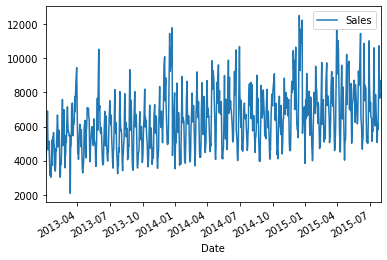

In [10]:
train=sales_data
#test = sales_data.loc['2015']
print("Data points used for training : ",len(train))
#print("Data points used for test : ",len(test))
train.plot()
plt.show()

## DICKY-Fuller Test

<img src="adfuller.png" />

In [62]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

In [63]:
# Run test
result = adfuller(train['Sales'])

In [64]:
print(result)
# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

(-4.089466993953712, 0.0010080882943698146, 13, 592, {'1%': -3.441444394224128, '5%': -2.8664345376276454, '10%': -2.569376663737217}, 9383.91807697439)
-4.089466993953712
0.0010080882943698146
{'1%': -3.441444394224128, '5%': -2.8664345376276454, '10%': -2.569376663737217}


## If data is non-satationary

which ARIMA model is the best fit for a dataset after trying different degrees of differencing and applying the Augmented Dicky-Fuller test on the differenced data.
1. ADF value
2. P-value

In [ ]:
'''# Take the first difference of the data
train_diff = train.diff().dropna()

# Create ARMA(2,2) model
arma = SARIMAX(train_diff, order=(2,0,2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())'''

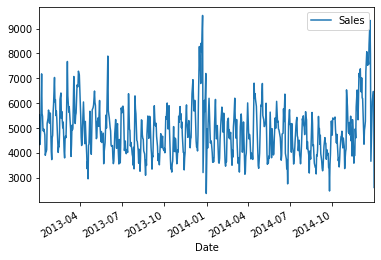

In [65]:
# Plot the time series
fig, ax = plt.subplots()
train.plot(ax=ax)
plt.show()

## ACF VS PACF 

1. ACF - Autocorrelation Function
2. PACF - Partial autocorrelation function
<img src="acf vs pacf.png" />

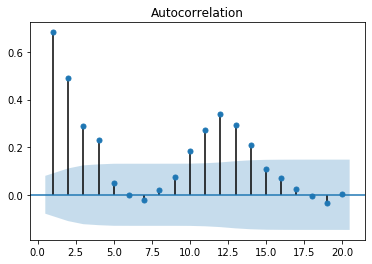

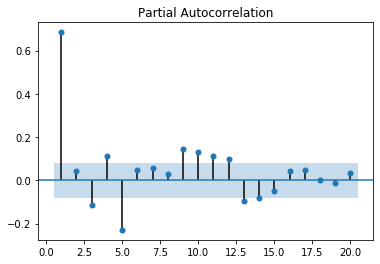

In [66]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train, lags=20, zero=False)
plot_pacf(train, lags=20, zero=False)
plt.show()

# ARMA Model

In [67]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(train, order=(1,1))
result_m = model.fit()

/home/omen/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [68]:
print(result_m.summary())

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  606
Model:                     ARMA(1, 1)   Log Likelihood               -4884.032
Method:                       css-mle   S.D. of innovations            765.089
Date:                Fri, 23 Aug 2019   AIC                           9776.065
Time:                        22:12:03   BIC                           9793.692
Sample:                             0   HQIC                          9782.924
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4820.4319    101.334     47.570      0.000    4621.822    5019.042
ar.L1.Sales     0.7038      0.039     17.900      0.000       0.627       0.781
ma.L1.Sales    -0.0306      0.052     -0.587    

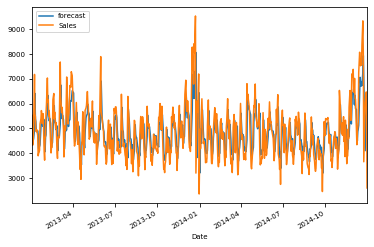

In [107]:
#Forecasting
result_m.plot_predict(start='2013-01-02', end='2014-12-31')
plt.show()

# ARIMA Model

In [135]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [149]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
for p in range(3):
  # Loop over q values from 0-2
    for q in range(3):
      	# create and fit ARMA(p,q) model
        model = SARIMAX(train, order=(p,0,q), trend='c')
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p,q,results.aic, results.bic))

/home/omen/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/omen/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/omen/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/omen/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency informati

In [150]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q           AIC           BIC
8  2  2   9762.445326   9788.886606
7  2  1   9766.937814   9788.972214
5  1  2   9772.467506   9794.501906
3  1  0   9774.412859   9787.633499
6  2  0   9775.947780   9793.575300
4  1  1   9776.162092   9793.789612
2  0  2   9779.282545   9796.910065
1  0  1   9927.406701   9940.627341
0  0  0  10157.451296  10166.265056
   p  q           AIC           BIC
3  1  0   9774.412859   9787.633499
8  2  2   9762.445326   9788.886606
7  2  1   9766.937814   9788.972214
6  2  0   9775.947780   9793.575300
4  1  1   9776.162092   9793.789612
5  1  2   9772.467506   9794.501906
2  0  2   9779.282545   9796.910065
1  0  1   9927.406701   9940.627341
0  0  0  10157.451296  10166.265056


In [184]:
# Now after searching p and q apply to the model
model_s = SARIMAX(train, order=(2,0,2), trend='c')
result_s = model_s.fit()

/home/omen/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [185]:
# Generate predictions
one_step_forecast = result_s.get_prediction(start=-100)

# Make ARIMA forecast of next 10 values
forecast = result_s.get_forecast(steps=10)

/home/omen/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [186]:
# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean
mean_forecast_

In [187]:
# Get confidence intervals of  predictions
confidence_intervals = one_step_forecast.conf_int()

In [188]:
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Sales']
upper_limits = confidence_intervals.loc[:,'upper Sales']

# Print best estimate  predictions
print(mean_forecast)

Date
2014-09-03    5051.712652
2014-09-04    4811.165084
2014-09-05    4535.142482
2014-09-06    4573.345453
2014-09-08    4278.622711
                 ...     
2014-12-24    7346.335616
2014-12-27    3929.382544
2014-12-29    5344.080811
2014-12-30    6575.580621
2014-12-31    5773.677536
Length: 100, dtype: float64


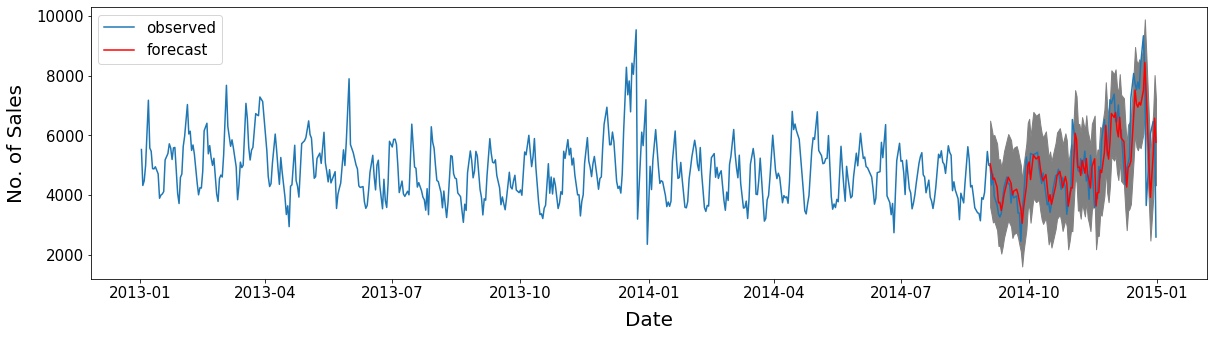

In [189]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,5))
# plot the amazon data
plt.plot(train.index, train, label='observed')
# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits,upper_limits, color='grey')
plt.xlabel('Date', labelpad=10, fontsize=20)
plt.ylabel('No. of Sales', labelpad=10, fontsize=20 )
plt.legend()
plt.show()

## AIC - Akaike information criterion


1. Lower AIC indicates a better model
2. AIC likes to choose simple models with lower order

In [190]:
print(result_s.aic)

9762.445326419442


## BIC - Bayesian information criterion


1. Very similar to AIC
2. Lower BIC indicates a better model
3. BIC likes to choose simple models with lower order

In [191]:
print(result_s.bic)

9788.886606335858


## Model diagnostics

In [192]:
# Assign residuals to variable
residuals = result_s.resid

In [193]:
mae = np.mean(np.abs(residuals))
print(mae)

535.3103104084511


### Plot diagnostics


If the model ts well the residuals will be white
Gaussian noise
<img src="plot_diagnostics.png" />

<Figure size 720x144 with 0 Axes>

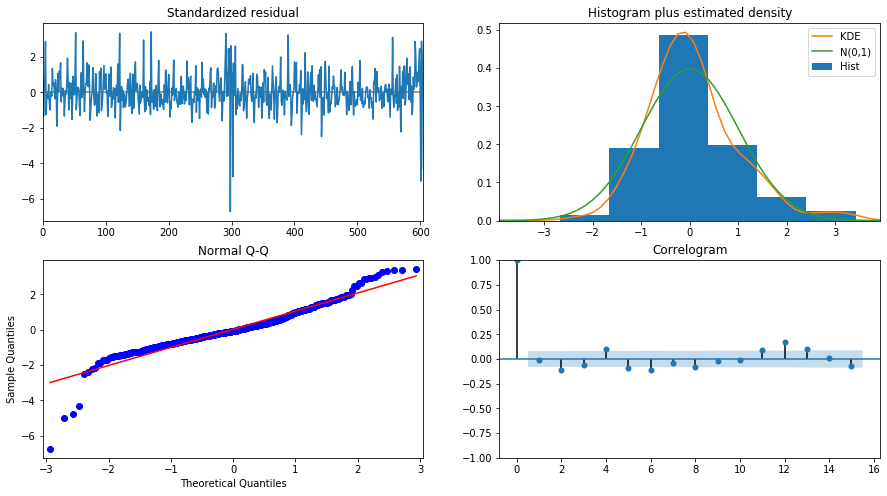

In [194]:
# Create the 4 diagostics plots
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(10,2))

result_s.plot_diagnostics(figsize=(15, 8), lags=15)
plt.show()

In [195]:
print(result_s.summary())

                           Statespace Model Results                           
Dep. Variable:                  Sales   No. Observations:                  606
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -4875.223
Date:                Fri, 23 Aug 2019   AIC                           9762.445
Time:                        23:39:12   BIC                           9788.887
Sample:                             0   HQIC                          9772.734
                                - 606                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1881.0451    303.848      6.191      0.000    1285.515    2476.575
ar.L1         -0.0614      0.069     -0.885      0.376      -0.197       0.075
ar.L2          0.6632      0.064     10.289      0.0

<img src="prob(Q, JB).png" />

## Unrolling ARMA forecast

In [ ]:
'''# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1,0]

# Print forecast
print(arma_value_forecast)'''